In [2]:
import sys
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from netCDF4 import Dataset 
import shapefile as shp  # Requires the pyshp package
from plot_map import plot_single_map

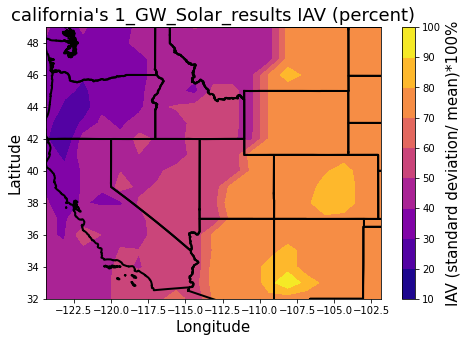

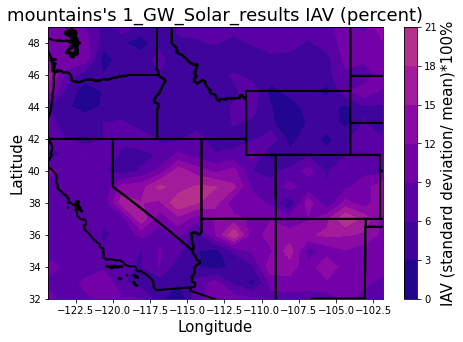

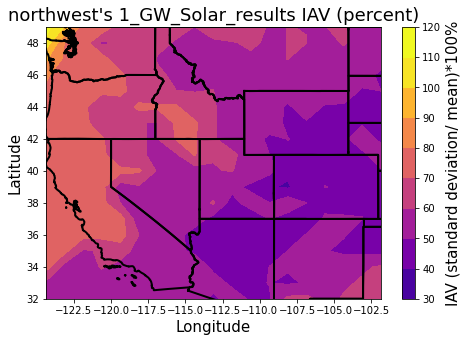

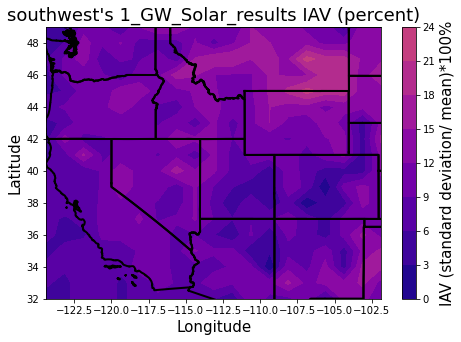

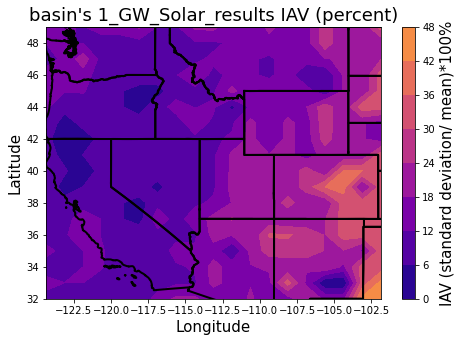

In [5]:
#plots the interannual variability for ELCC values (standard deviation / mean) * 100% of the desired results below 
######### change this value below to see the other maps (e.g. 1_GW_wind_results)
fileName = "1_GW_Solar_results"
regions = ["california","mountains","northwest","southwest","basin"]


testFilePath = "mountains/2016/1_GW_Wind_results.csv"
results = pd.read_csv(testFilePath,index_col=0)

latitude = results['latitude'].values.astype(float)
longitude = results['longitude'].values.astype(float)
elcc = results['ELCC'].values.astype(int)

# make map 

uniqueLats = np.unique(latitude)
uniqueLons = np.unique(longitude)


for region in regions:       
    elcc_map = np.zeros((3,len(uniqueLats),len(uniqueLons)))
    for yearIndex,year in enumerate(['2016','2017','2018']):
        results_directory = region+'/'+year+'/'
        results_filename = results_directory + fileName + ".csv"
        results = pd.read_csv(results_filename,index_col=0)

        latitude = results['latitude'].values.astype(float)
        longitude = results['longitude'].values.astype(float)
        elcc = results['ELCC'].values.astype(int)

        # fill map

        for i in range(len(elcc)):

            elcc_map[yearIndex,np.argwhere(uniqueLats == latitude[i])[0,0], np.argwhere(uniqueLons == longitude[i])[0,0]] = elcc[i]

    #get mean and standard deviation final arrays
    mean = np.mean(elcc_map,axis=0)
    std = np.std(elcc_map,axis=0)
    #fixedStdValues = np.where(std < .5,.5,std)
    iavValues = std/mean * 100
    #now plotting
    fig = plt.figure(figsize=(7.5,5))
    ax = fig.add_subplot(111)                
    plot_single_map(ax, iavValues, uniqueLats, uniqueLons, region, year, ["%s's %s IAV (percent)" % (region,fileName),'IAV (standard deviation/ mean)*100%'],False,True)
    plt.show()